In [1]:
#Import Packages 
import xarray as xr
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import os 
import metpy 
import metpy.calc as mpcalc
from metpy.plots import SkewT
from metpy.units import units 
from IPython.display import HTML, display 
import imageio
from tqdm import tqdm
from itertools import product
import wrf 
import glob 
from scipy.interpolate import RegularGridInterpolator, interp1d
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from pathlib import Path

Cannot import USCOUNTIES and USSTATES without Cartopy installed.


In [2]:
# Read in Simulation Data File Names
data_path = '/storage/group/pmm116/default/pmm116/predictability_study-30sec-output/prestorm16/'
file_paths = glob.glob(data_path + "*00*.nc")
file_names = sorted([Path(path).name for path in file_paths if path.endswith(".nc")])

In [3]:
# Create Basic Global Variables

# Load One of the Datasets
sample_data = xr.open_dataset(data_path + file_names[0])

# Grid Locations
x_grid = sample_data['xf'].values
y_grid = sample_data['yf'].values
z_grid = sample_data['zf'].values

# Scalar Value Locations
x_data = sample_data['xh'].values
y_data = sample_data['yh'].values
z_data = sample_data['z'].values

# Time Array
time = np.linspace(0,(len(file_names)-1)*30, len(file_names), dtype='int')


In [8]:
# Sanity Check: Animate Reflectivity and w-wind to make sure no storm is present

# Path of GIFs
path = '/storage/work/bsh5393//Masters Thesis/Pre-Storm PseudoSoundings/Figure Builder/'
gifname = '/storage/work/bsh5393/Masters Thesis/Pre-Storm PseudoSoundings/GIFs/test_updraft.gif'

# Loop that saves each figure
for t in tqdm(np.arange(0, len(time), 1)):
    
    # image filename
    image_filename = 'figure_%03d.png' % (t)
    
    # initialize figure
    fig = plt.figure(figsize=(8,8))
    
    # plot reflectivity
    updraft = plt.contourf(x_data, y_data, 
                        xr.open_dataset(data_path + file_names[t])['winterp'].isel(time = 0, nk=17),
                        levels = np.arange(-7,8,1,dtype='int'), vmin=-7, vmax=7, cmap='bwr')
    # colorbar
    vcolorbar = fig.colorbar(updraft, label='m/s', orientation='vertical')
    
    # titles
    plt.title(f'Vertical Wind @ z = 522 m. Time = {time[t]} s')
    plt.xlabel('km')
    plt.ylabel('km')
    
    # save figure
    fig.savefig(path+image_filename)
    
    # clear figure
    plt.close()
    
#Combine Above Images into GIF
#These variables control the time step (interval) and the length of the pause at the end of the animation (end_interval)
interval = 0.15
end_interval = 1.0

#Iterating through all of the files in path, and then sorting the filenames
imagefiles = os.listdir(path)
# imagefiles.remove('.ipynb_checkpoints')


image_filenames = []

for image_filename in imagefiles[:t]:
    image_filenames.append(image_filename)
image_filenames.sort()
    
#Opening each image file and saving it to a list
images = []
for image_filename in tqdm(image_filenames[:t]):
    images.append(imageio.imread(path + image_filename))
      
#Generating an array containing the duration to display each frame
durations = np.ones(len(images))*interval
durations[-1] = end_interval

#Generating the animation itself
imageio.mimsave(gifname, images, duration = durations.tolist())

100%|██████████| 120/120 [00:00<00:00, 171.91it/s]


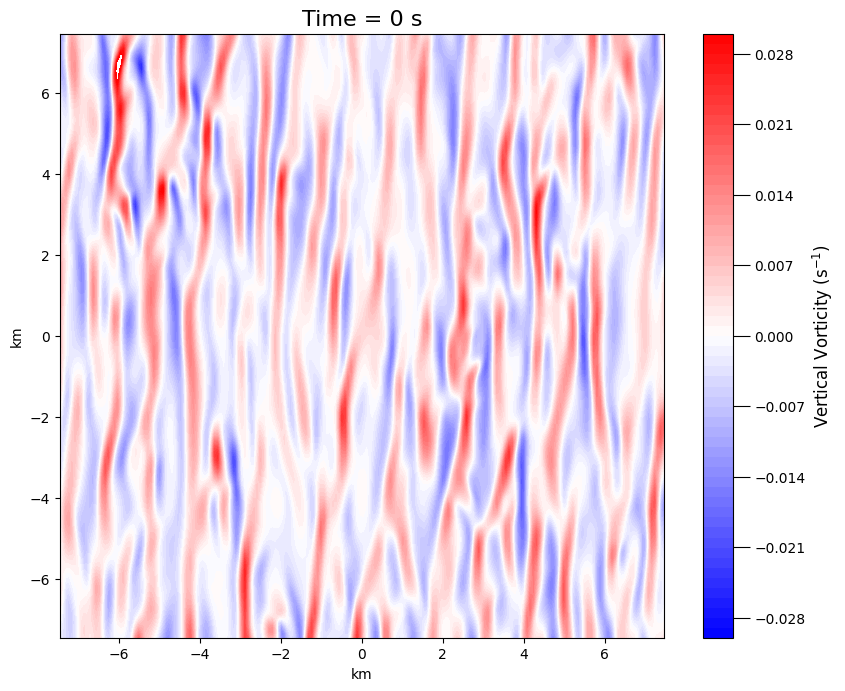

In [38]:
# initialize figure
fig = plt.figure(figsize=(10,8), dpi=100)

# plot reflectivity
updraft = plt.contourf(x_data[750:950], y_data[750:950], 
                    xr.open_dataset(data_path + file_names[0])['zvort'].isel(time = 0, nk=0, nj=slice(750,950), ni=slice(750,950)),
                    levels = np.arange(-0.03, 0.031, 0.001), vmin = -0.03, vmax = 0.03, cmap='bwr')
# colorbar
vcolorbar = fig.colorbar(updraft, orientation='vertical')
vcolorbar.set_label(label='Vertical Vorticity (s$^{-1})$', fontsize=12)
vcolorbar.ax.tick_params(size=12)

# titles
plt.title(f'Time = {time[0]} s', fontsize=16)
plt.xlabel('km')
plt.ylabel('km')
plt.gca().set_aspect('equal')

In [39]:
# Animate Coherent Turbulent Structures

# Path of GIFs
path = '/storage/work/bsh5393//Masters Thesis/Pre-Storm PseudoSoundings/Figure Builder/'
gifname = '/storage/work/bsh5393/Masters Thesis/Pre-Storm PseudoSoundings/GIFs/Microscale.gif'

# Loop that saves each figure
for t in tqdm(np.arange(0, len(time), 1)):
    
    # image filename
    image_filename = 'figure_%03d.png' % (t)
    

    # initialize figure
    fig = plt.figure(figsize=(10,8), dpi=150)

    # plot reflectivity
    updraft = plt.contourf(x_data[750:950], y_data[750:950], 
                        xr.open_dataset(data_path + file_names[t])['zvort'].isel(time = 0, nk=0, nj=slice(750,950), ni=slice(750,950)),
                        levels = np.arange(-0.03, 0.031, 0.001), vmin = -0.03, vmax = 0.03, cmap='bwr')
    # colorbar
    vcolorbar = fig.colorbar(updraft, orientation='vertical')
    vcolorbar.set_label(label='Vertical Vorticity (s$^{-1})$', fontsize=12)
    vcolorbar.ax.tick_params(size=12)

    # titles
    plt.title(f'Time = {time[t]} s', fontsize=16)
    plt.xlabel('km')
    plt.ylabel('km')
    plt.gca().set_aspect('equal')
    
    # save figure
    fig.savefig(path+image_filename)
    
    # clear figure
    plt.close()
    
#Combine Above Images into GIF
#These variables control the time step (interval) and the length of the pause at the end of the animation (end_interval)
interval = 0.15
end_interval = 1.0

#Iterating through all of the files in path, and then sorting the filenames
imagefiles = os.listdir(path)
# imagefiles.remove('.ipynb_checkpoints')


image_filenames = []

for image_filename in imagefiles[:t]:
    image_filenames.append(image_filename)
image_filenames.sort()
    
#Opening each image file and saving it to a list
images = []
for image_filename in tqdm(image_filenames[:t]):
    images.append(imageio.imread(path + image_filename))
      
#Generating an array containing the duration to display each frame
durations = np.ones(len(images))*interval
durations[-1] = end_interval

#Generating the animation itself
imageio.mimsave(gifname, images, duration = durations.tolist())
    

100%|██████████| 120/120 [00:03<00:00, 32.14it/s]
